In [ ]:
import pandas as pd

data = pd.read_csv('iris.data')
data

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,Iris-virginica
145,6.3,2.5,5.0,1.9,Iris-virginica
146,6.5,3.0,5.2,2.0,Iris-virginica
147,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
import torch

data_x = torch.from_numpy(data.iloc[:, :4].values)
data_y = data.iloc[:, 4]

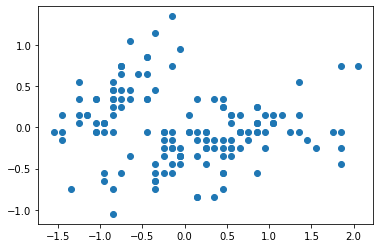

In [ ]:
import matplotlib.pyplot as plt

data_xx = data_x - data_x.mean(dim=0)

plt.scatter(data_xx[:, 0], data_xx[:, 1])
plt.show()

In [ ]:
def findPC(X):
  w = torch.randn(X.shape[1])
  w_size = (w * w).sum() ** 0.5
  w /= w_size

  lr = 0.1

  for epoch in range(100):
    w.requires_grad_(True)
    variance = -((X * w).sum(dim=1) ** 2).mean()

    variance.backward()

    with torch.no_grad():
      w = w - lr * w.grad
      w /= (w * w).sum()**0.5

  w.requires_grad_(False)
  return w, -variance.item()

w, v = findPC(X)
print(w, v)

tensor([ 0.3626, -0.0812,  0.8563,  0.3587]) 4.176169307710504


In [ ]:
X = data_x - data_x.mean(dim=0)

In [ ]:
def PCA(k, X):
  pcs = []
  vars = []

  Z = X - X.mean(dim=0)

  for i in range(k):
    w, v = findPC(Z)
    pcs.append(w)
    vars.append(v)

    Z = Z - (Z * w).sum(dim=1).unsqueeze(1) * w
  
  return pcs, vars

pcs, vars = PCA(4, X)

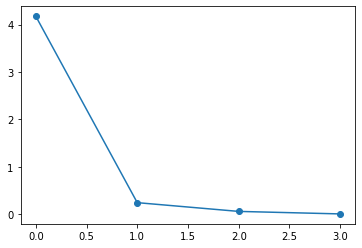

In [ ]:
plt.plot(vars, "-o")
plt.show()

In [ ]:
X = torch.tensor(X, dtype=torch.float)
XX = X @ torch.stack(pcs[:2]).T

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


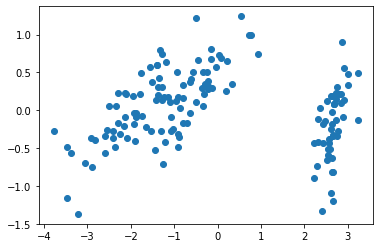

In [ ]:
plt.scatter(XX[:, 0], XX[:, 1])
plt.show()